In [10]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [11]:
df_india = df[df['job_country'] == 'India'].copy()

In [12]:
# extract the month name from 'job_posted_date'
df_india['job_posted_month'] = df_india['job_posted_date'].dt.strftime('%B')

In [13]:
df_india_pivot = df_india.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')

In [14]:
df_india_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,170,32,418,1566,946,54,86,375,194,169
August,189,25,618,1407,1157,47,126,343,235,148
December,186,27,648,1464,1206,94,77,343,200,133
February,143,35,433,1631,932,42,94,313,165,157
January,175,31,628,2132,1444,70,127,448,269,192
July,142,25,457,1528,1123,54,75,359,204,155
June,146,26,367,1632,1129,41,66,427,238,125
March,116,37,422,1591,1005,34,96,351,194,180
May,103,14,278,1384,837,31,59,329,134,98


In [15]:
df_india_pivot.reset_index(inplace=True)
df_india_pivot['month_number'] = pd.to_datetime(df_india_pivot['job_posted_month'], format = '%B').dt.month


In [17]:
df_india_pivot.sort_values('month_number', inplace=True)

In [18]:
df_india_pivot

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_number
4,January,175,31,628,2132,1444,70,127,448,269,192,1
3,February,143,35,433,1631,932,42,94,313,165,157,2
7,March,116,37,422,1591,1005,34,96,351,194,180,3
0,April,170,32,418,1566,946,54,86,375,194,169,4
8,May,103,14,278,1384,837,31,59,329,134,98,5
6,June,146,26,367,1632,1129,41,66,427,238,125,6
5,July,142,25,457,1528,1123,54,75,359,204,155,7
1,August,189,25,618,1407,1157,47,126,343,235,148,8
11,September,155,34,630,1508,984,67,85,324,195,132,9
10,October,170,36,500,1476,902,85,67,318,180,167,10


In [19]:
df_india_pivot.set_index('job_posted_month', inplace=True)

In [20]:
df_india_pivot.drop(columns='month_number', inplace=True)

In [21]:
df_india_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,175,31,628,2132,1444,70,127,448,269,192
February,143,35,433,1631,932,42,94,313,165,157
March,116,37,422,1591,1005,34,96,351,194,180
April,170,32,418,1566,946,54,86,375,194,169
May,103,14,278,1384,837,31,59,329,134,98
June,146,26,367,1632,1129,41,66,427,238,125
July,142,25,457,1528,1123,54,75,359,204,155
August,189,25,618,1407,1157,47,126,343,235,148
September,155,34,630,1508,984,67,85,324,195,132


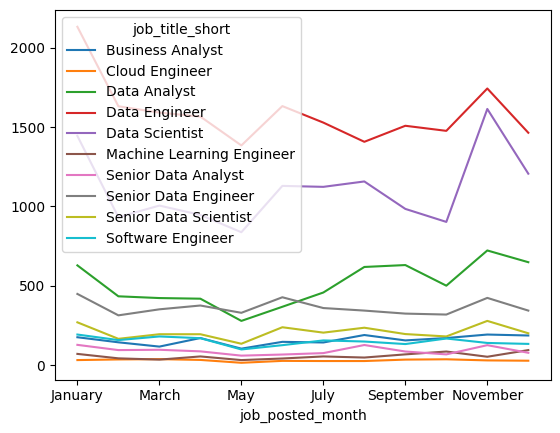

In [22]:
df_india_pivot.plot(kind='line')
plt.show()

In [24]:
top_3 = df_india['job_title_short'].value_counts().head(3)
top_3 = top_3.index.tolist()
top_3

['Data Engineer', 'Data Scientist', 'Data Analyst']

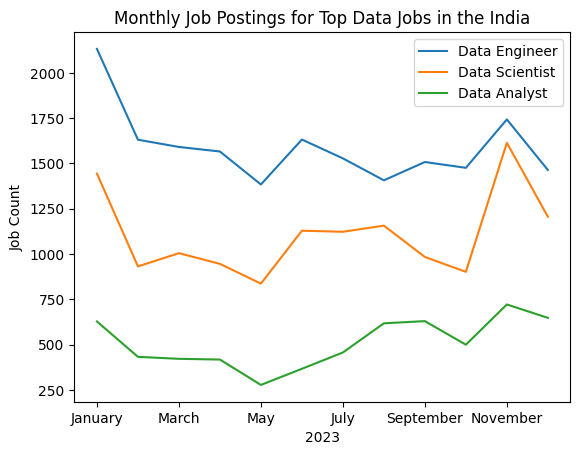

In [26]:
df_india_pivot[top_3].plot(kind='line')
plt.title('Monthly Job Postings for Top Data Jobs in the India')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()